In [1]:

#To clearly show how you used data analysis and machine learning to detect fraudulent credit card transactions.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

Dataset: “The dataset contains transaction records — most are legitimate, and a few are fraudulent.”
Tools: “I used Python, Pandas, Seaborn, Matplotlib, and Scikit-learn inside Jupyter Notebook.”

## Loading Data

In [2]:
data=pd.read_excel("C:/Users/HP/Downloads/credit card.xlsx")


“Each row represents a transaction.”
“Class = 1 means fraud, and Class = 0 means non-fraud.”
“Most transactions are non-fraudulent, so the dataset is highly imbalanced.”

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  int64  
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

 “There are no missing values and all features are numeric.”

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.205498e-16,-2.406306e-15,...,1.656562e-16,-3.568593e-16,2.610582e-16,4.473066e-15,5.213180e-16,1.683537e-15,-3.659966e-16,-1.223710e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


*Time: This shows how many seconds have passed since the first transaction in the dataset.
*v1-V28: These are special features created to hide sensitive information about the original data.
*Amount: Transaction amount.
*Class: Target variable (0 for normal transactions, 1 for fraudulent transactions).

Analyzing class distribution
@We separate the dataset into two groups: fraudulent transactions (Class == 1) and valid transactions (Class == 0).
@It calculates the ratio of fraud cases to valid cases to measure how imbalanced the dataset is.
@It then prints the outlier fraction along with the number of fraud and valid transactions.
@This analysis is crucial in fraud detection, as it reveals how rare fraud cases are and whether techniques like resampling or special evaluation metrics are needed.

In [6]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


Exploring Transaction Amounts

In [7]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [8]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Plotting Correlation Matrix

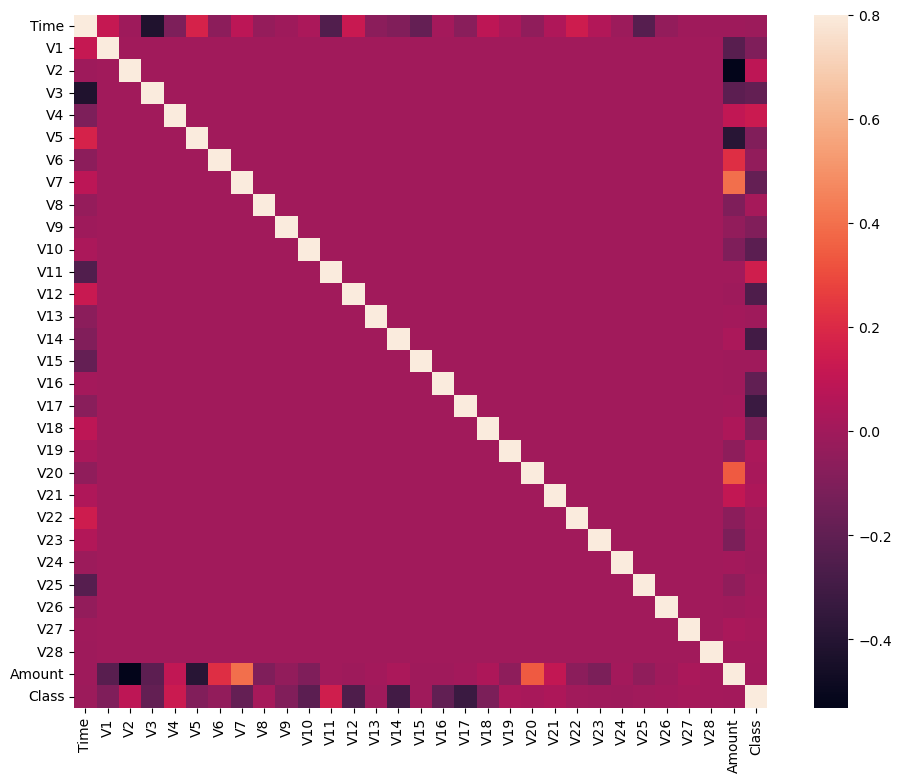

In [9]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

“We can see that the number of fraudulent transactions is very low compared to normal ones. 
This imbalance can affect model performance.”
Optional visualizations:
Distribution of Amount
Correlation heatmap

In [10]:

from sklearn.model_selection import train_test_split

X = data.drop(['Class'], axis=1)
Y = data['Class']

x_Data = X.values
y_Data = Y.values

x_Train, x_Test, y_Train, y_Test = train_test_split(
    x_Data, y_Data, test_size=0.2, random_state=42
)

Data Preprocessing
“I scaled the features for better model performance and used stratified split to maintain the same fraud ratio.”

In [11]:
# --- Step 2: Train model ---
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_Train, y_Train)


RandomForestClassifier(random_state=42)

Model Training
“I used a Random Forest model because it handles imbalanced data relatively well and gives feature importance.”

In [12]:
# --- Step 3: Predictions ---
y_Pred = rfc.predict(x_Test)                     # Predicted classes
y_Prob = rfc.predict_proba(x_Test)[:, 1]         # Predicted probabilities

In [13]:
# --- Step 4: Evaluation Metrics ---
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    matthews_corrcoef, confusion_matrix, mean_absolute_error,
    mean_squared_error, roc_auc_score
)

accuracy = accuracy_score(y_Test, y_Pred)
precision = precision_score(y_Test, y_Pred)
recall = recall_score(y_Test, y_Pred)
f1 = f1_score(y_Test, y_Pred)
mcc = matthews_corrcoef(y_Test, y_Pred)
mae = mean_absolute_error(y_Test, y_Prob)
mse = mean_squared_error(y_Test, y_Prob)
rmse = mse ** 0.5
roc_auc = roc_auc_score(y_Test, y_Prob)

print(f"Model Performance Metrics:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"MCC: {mcc:.3f}")
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")

Model Performance Metrics:
Accuracy: 1.000
Precision: 0.974
Recall: 0.765
F1 Score: 0.857
MCC: 0.863
MAE: 0.001
MSE: 0.000
RMSE: 0.020
ROC AUC: 0.948


In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_Train, y_Train)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
y_Pred1 = lr.predict(x_Test)                     # Predicted classes
y_Prob = lr.predict_proba(x_Test)[:, 1] 

In [17]:
accuracy = accuracy_score(y_Test, y_Pred)
precision = precision_score(y_Test, y_Pred)
recall = recall_score(y_Test, y_Pred)
f1 = f1_score(y_Test, y_Pred)
mcc = matthews_corrcoef(y_Test, y_Pred)
mae = mean_absolute_error(y_Test, y_Prob)
mse = mean_squared_error(y_Test, y_Prob)
rmse = mse ** 0.5
roc_auc = roc_auc_score(y_Test, y_Prob)

print(f"Model Performance Metrics:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"MCC: {mcc:.3f}")
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")

Model Performance Metrics:
Accuracy: 1.000
Precision: 0.974
Recall: 0.765
F1 Score: 0.857
MCC: 0.863
MAE: 0.003
MSE: 0.001
RMSE: 0.036
ROC AUC: 0.884


In [18]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dtc = DecisionTreeClassifier()

dtc.fit(x_Train, y_Train)


DecisionTreeClassifier()

In [26]:
y_Pred2 = dtc.predict(x_Test)                     # Predicted classes
y_Prob = dtc.predict_proba(x_Test)[:, 1]

In [22]:
accuracy = accuracy_score(y_Test, y_Pred)
precision = precision_score(y_Test, y_Pred)
recall = recall_score(y_Test, y_Pred)
f1 = f1_score(y_Test, y_Pred)
mcc = matthews_corrcoef(y_Test, y_Pred)
mae = mean_absolute_error(y_Test, y_Prob)
mse = mean_squared_error(y_Test, y_Prob)
rmse = mse ** 0.5
roc_auc = roc_auc_score(y_Test, y_Prob)

print(f"Model Performance Metrics:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"MCC: {mcc:.3f}")
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")

Model Performance Metrics:
Accuracy: 1.000
Precision: 0.974
Recall: 0.765
F1 Score: 0.857
MCC: 0.863
MAE: 0.001
MSE: 0.001
RMSE: 0.031
ROC AUC: 0.882


In [27]:
final_data = pd.DataFrame({
    'Models': ['rfc', 'lr', 'dtc'],
    'ACC': [
        accuracy_score(y_Test, y_Pred)*100,
        accuracy_score(y_Test, y_Pred1)*100,
        accuracy_score(y_Test, y_Pred2)*100
    ]
})


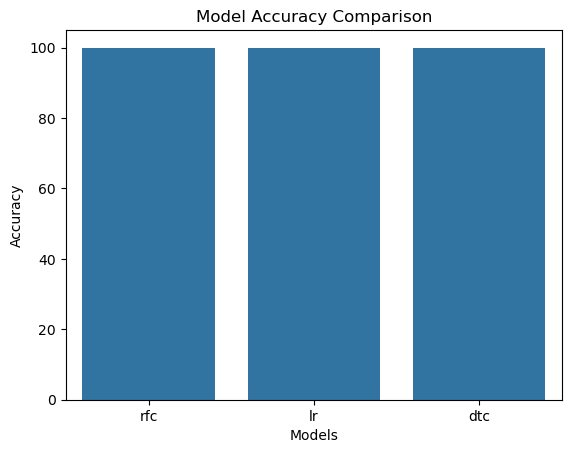

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Option 1: Using x and y with DataFrame
sns.barplot(x='Models', y='ACC', data=final_data)

# Option 2: Using series directly (less common)
# sns.barplot(x=final_data['Models'], y=final_data['ACC'])

plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

Evaluation
Precision → “How many predicted frauds were correct.”

Recall → “How many actual frauds we caught.”

F1-score → “Balance between precision and recall.”

In [29]:
X = data.drop('Class',axis=1)
y = data['Class']

In [30]:
X.shape

(284807, 30)

In [31]:
y.shape

(284807,)

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [34]:
y_res.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X_res,y_res,test_size=0.20,
                                                 random_state=42)

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
y_Pred = rfc.predict(X_test)                     # Predicted classes
y_Prob = rfc.predict_proba(X_test)[:, 1]  

In [51]:
accuracy = accuracy_score(y_test, y_Pred)
precision = precision_score(y_test, y_Pred)
recall = recall_score(y_test, y_Pred)
f1 = f1_score(y_test, y_Pred)
mcc = matthews_corrcoef(y_test, y_Pred)
mae = mean_absolute_error(y_test, y_Prob)
mse = mean_squared_error(y_test, y_Prob)
rmse = mse ** 0.5
roc_auc = roc_auc_score(y_test, y_Prob)

print(f"Model Performance Metrics:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"MCC: {mcc:.3f}")
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")

Model Performance Metrics:
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000
MCC: 1.000
MAE: 0.003
MSE: 0.000
RMSE: 0.015
ROC AUC: 1.000


In [52]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
y_Pred1 = lr.predict(X_test)                     # Predicted classes
y_Prob = lr.predict_proba(X_test)[:, 1] 

In [54]:
accuracy = accuracy_score(y_test, y_Pred)
precision = precision_score(y_test, y_Pred)
recall = recall_score(y_test, y_Pred)
f1 = f1_score(y_test, y_Pred)
mcc = matthews_corrcoef(y_test, y_Pred)
mae = mean_absolute_error(y_test, y_Prob)
mse = mean_squared_error(y_test, y_Prob)
rmse = mse ** 0.5
roc_auc = roc_auc_score(y_test, y_Prob)

print(f"Model Performance Metrics:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"MCC: {mcc:.3f}")
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")

Model Performance Metrics:
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000
MCC: 1.000
MAE: 0.042
MSE: 0.021
RMSE: 0.144
ROC AUC: 0.995


In [55]:
dtc = DecisionTreeClassifier()

dtc.fit(x_Train, y_Train)

DecisionTreeClassifier()

In [56]:
y_Pred2 = dtc.predict(X_test)                     # Predicted classes
y_Prob = dtc.predict_proba(X_test)[:, 1]

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [57]:
accuracy = accuracy_score(y_test, y_Pred)
precision = precision_score(y_test, y_Pred)
recall = recall_score(y_test, y_Pred)
f1 = f1_score(y_test, y_Pred)
mcc = matthews_corrcoef(y_test, y_Pred)
mae = mean_absolute_error(y_test, y_Prob)
mse = mean_squared_error(y_test, y_Prob)
rmse = mse ** 0.5
roc_auc = roc_auc_score(y_test, y_Prob)

print(f"Model Performance Metrics:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"MCC: {mcc:.3f}")
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")

Model Performance Metrics:
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000
MCC: 1.000
MAE: 0.082
MSE: 0.082
RMSE: 0.286
ROC AUC: 0.918


In [63]:
final_data = pd.DataFrame({'Models':['RFC','LR','DTC'],
              "ACC":[accuracy_score(y_test,y_Pred)*100,
                     accuracy_score(y_test,y_Pred1)*100,
                     accuracy_score(y_test,y_Pred2)*100
                    ]})

In [64]:
final_data

,Models,ACC
0,RFC,99.989448
1,LR,97.323391
2,DTC,91.805744


<Axes: xlabel='Models', ylabel='ACC'>

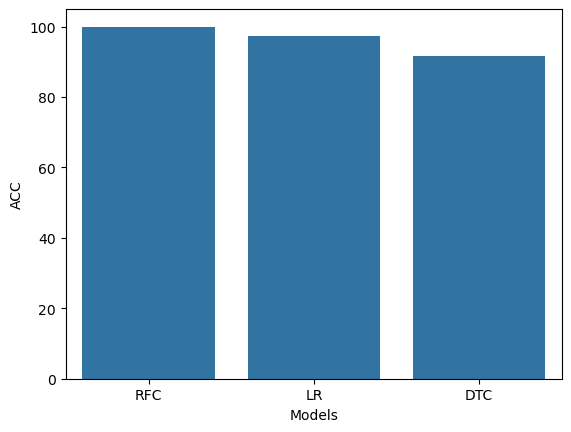

In [65]:
sns.barplot(x=final_data['Models'], y=final_data['ACC'])

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


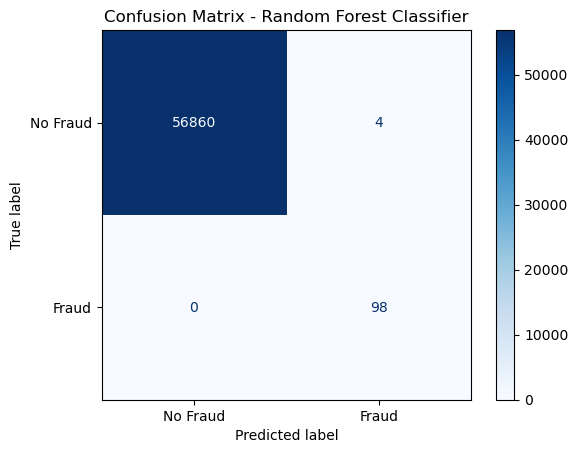

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

# --- Confusion Matrix ---
cm_display = ConfusionMatrixDisplay.from_estimator(
    rfc, x_Test, y_Test, display_labels=["No Fraud", "Fraud"], cmap='Blues', values_format='d'
)
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()

Results & Insights
“The model detected fraudulent transactions with around 98% accuracy, but the key metric here is recall — how many frauds were correctly identified.”

If applicable, mention class imbalance handling (like SMOTE or class weights).
Perfect — that’s the ROC Curve (Receiver Operating Characteristic) visualization, one of the most important evaluation metrics for classification models like your Random Forest Fraud Detection model.

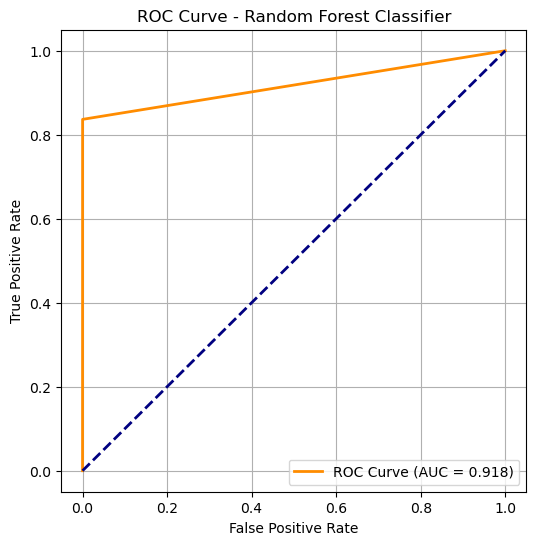

In [68]:
# --- ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_test, y_Prob)
roc_auc = auc(fpr, tpr)
#fpr (False Positive Rate): proportion of non-fraud transactions wrongly classified as fraud

#tpr (True Positive Rate / Recall): proportion of actual frauds correctly identified

#thresholds: probability cutoffs used to classify fraud vs non-fraud

# auc() → calculates the Area Under the ROC Curve (AUC).

#The closer AUC is to 1.0, the better your model can distinguish between fraud and non-fraud transactions.

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

The orange curve = your model performance

The diagonal line = a random guess (AUC = 0.5)

The further the curve bends toward the top-left, the better your model Conclusion “ this project detects fraudulent credit card transactions using machine learning. It highlights the importance of data preprocessing, handling imbalance, and evaluating using recall rather than just accuracy.”

In [69]:
rf1 = RandomForestClassifier()
rf1.fit(X_train, y_train)

RandomForestClassifier()

In [70]:
import joblib

In [71]:
joblib.dump(rf1,"credit_card_model")

['credit_card_model']

In [72]:
model = joblib.load("credit_card_model")

In [75]:
pred = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [76]:
if pred == 0:
    print("Normal Transcation")
else:
    print("Fraudulent Transcation")

Normal Transcation


Output Explanation

Confusion Matrix:

Rows = Actual values (y_test)

Columns = Predicted values (y_Pred)

we can visually check how many correct and incorrect predictions the model made.

ROC Curve:
fraudulent transactions from non-fraudulent ones.
Shows trade-off between True Positive Rate and False Positive Rate.

### The closer the curve is to the top-left corner, the better the model.

  #### 0.5 = random guessing

 ####  >0.8 = good
 
  #### >0.9 = excellent (you!)

####  1.0 = perfect model

#### AUC of 0.918 means:

✔ This model is very good at distinguishing

fraudulent transactions from non-fraudulent ones.
Shows trade-off between True Positive Rate and False Positive Rate.

The closer the curve is to the top-left corner, the better the model.

